# Data Visualization with Haberman Dataset

In [138]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Haberman Survival Dataset

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999 Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### More information about Haberman Survival Dataset

Number of Instances: 306
Number of Attributes: 4 (including the class attribute)

#### Attribute Information:
Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

#### Missing Attribute Values: None

In [139]:
df=pd.read_csv("haberman.csv",header=None)
df.columns=['age','operation_at_age','number_auxilary_nodes','survival_status']
df.shape

(306, 4)

In [140]:
df.columns

Index(['age', 'operation_at_age', 'number_auxilary_nodes', 'survival_status'], dtype='object')

In [141]:
print("Number of points is %d" %(df.shape[0]))

Number of points is 306


In [142]:
print("Number of features is %d" %(df.shape[1]-1))

Number of features is 3


In [143]:
len(df['survival_status'].unique())

2

In [144]:
#chnage level 2 to 0
def change_2_to_0(x):
    if x==2:
        return 0
    else:
        return 1
#print(df['survival_status'][7])
df['survival_status']=df['survival_status'].apply(change_2_to_0)
#print(df['survival_status'][7])

In [145]:
print("This is a imbalance data set as the ratio of positive to negative points is %d : %d" %(len(df[df['survival_status']==1]),len(df[df['survival_status']==0])))

This is a imbalance data set as the ratio of positive to negative points is 225 : 81


In [146]:
df['survival_status'].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

### Observation 1: This might require a upsampling of data

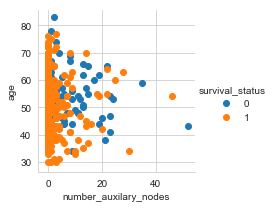

In [147]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status').map(plt.scatter,'number_auxilary_nodes','age').add_legend()
plt.show()

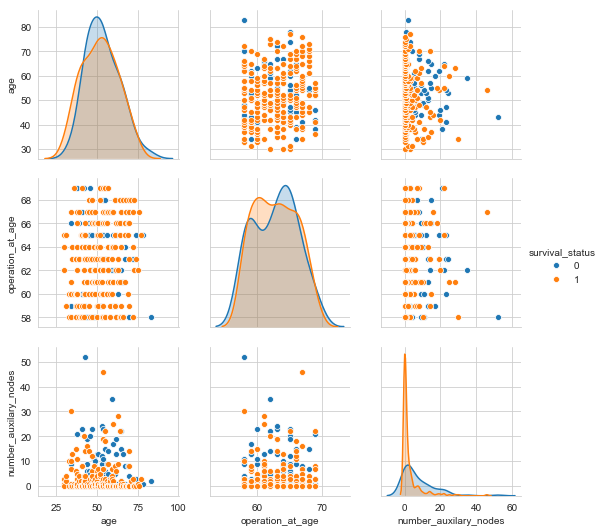

In [148]:
sns.pairplot(df,hue='survival_status',vars=['age', 'operation_at_age', 'number_auxilary_nodes'])

### Observation 2:
* if given condition to choose two features I will prefer 'number of auxilary nodes' and 'operation at age'
* survival status is maximum if the  patient has 0

## Distribution plots of paired features

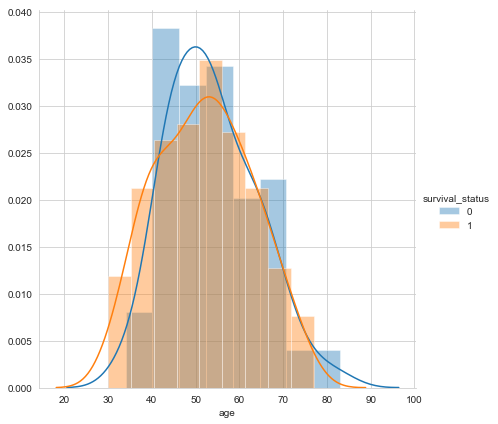

In [149]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'age').add_legend()

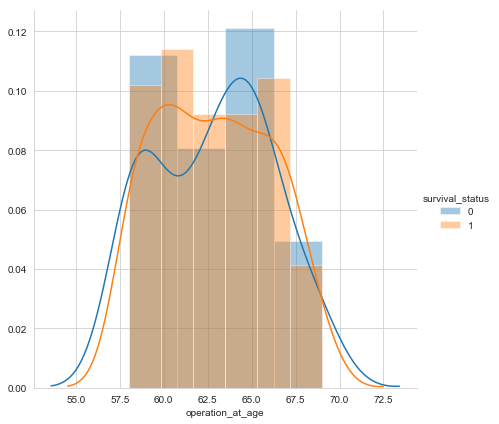

In [150]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'operation_at_age').add_legend()

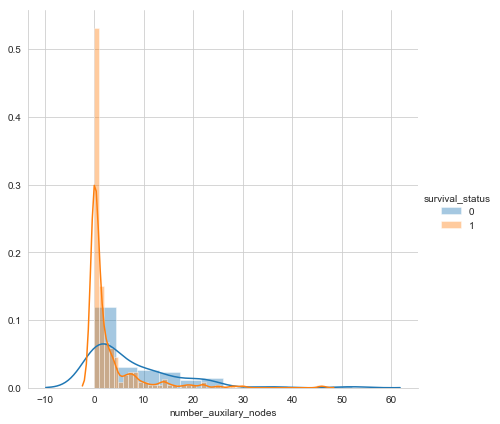

In [151]:
sns.FacetGrid(df,hue='survival_status',height=6).map(sns.distplot,'number_auxilary_nodes').add_legend()

### Observation 3
* plot of auxilary nodes and survival status seems reasonable, but it has a lot of over lapping too. The model can not be concrete on this feature.

[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


Text(0.5,1,'PDF and CDF of opeartion at age')

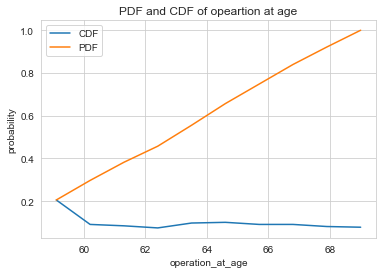

In [161]:
import numpy as np
count,bin_edges=np.histogram(df['operation_at_age'],density=True,bins=10)
pdf=count/sum(count)
#print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend({'PDF','CDF'})
plt.xlabel('operation_at_age')
plt.ylabel('probability')
plt.title('PDF and CDF of opeartion at age')

[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


Text(0.5,1,'PDF and CDF of current age')

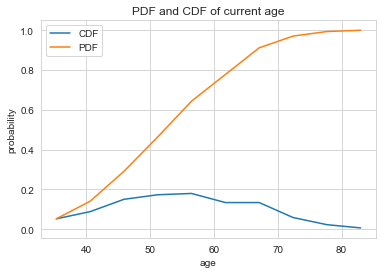

In [162]:
import numpy as np
count,bin_edges=np.histogram(df['age'],density=True,bins=10)
pdf=count/sum(count)
#print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend({'PDF','CDF'})
plt.xlabel('age')
plt.ylabel('probability')
plt.title('PDF and CDF of current age')

[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0.5,1,'PDF and CDF of auxilary nodes')

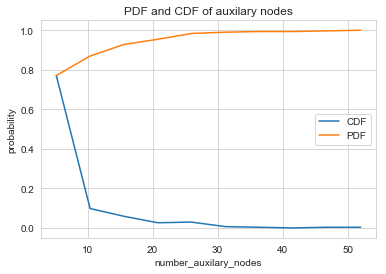

In [163]:
import numpy as np
count,bin_edges=np.histogram(df['number_auxilary_nodes'],density=True,bins=10)
pdf=count/sum(count)
#print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend({'PDF','CDF'})
plt.xlabel('number_auxilary_nodes')
plt.ylabel('probability')
plt.title('PDF and CDF of auxilary nodes')

### Plotting box plot will let us know more about the quantiles

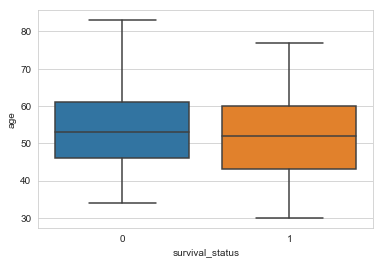

In [164]:
sns.boxplot(data=df,x='survival_status',y='age')

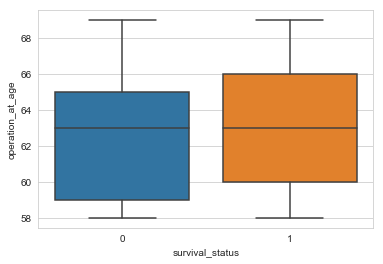

In [165]:
sns.boxplot(data=df,x='survival_status',y='operation_at_age')

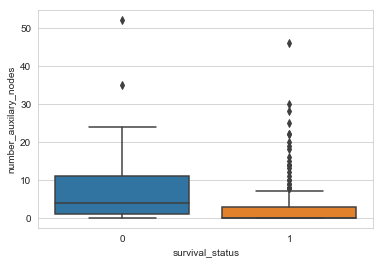

In [166]:
sns.boxplot(data=df,x='survival_status',y='number_auxilary_nodes')

### Observation 4
* From the above plot of auxilary nodes and survival status -- there are a lot of outlier points who survived. At this point of time I believe the dataset is in separable using linear models.

* From other two box plots, the data is very less likely to be separable

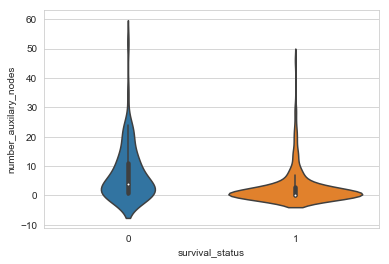

In [167]:
sns.violinplot(data=df,x='survival_status',y='number_auxilary_nodes')

### Observation 5
* The distribution of data is slightly skewed

### <u>Conclusion</u>
### Data seems in separable using linear models. Some more complex models which can capture curves in might be helpful here.